### Code From ©StarxSky (Kaggle username: [Lau0_1b](https://www.kaggle.com/lau01b))

In [1]:
!nvidia-smi

Wed Oct 19 14:58:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------




<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Dataset Download :

https://www.kaggle.com/datasets/carlosrunner/pizza-not-pizza



In [2]:
!pip install --upgrade torch==1.12.1
!pip install --upgrade torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 3.19.4 which is incompatible.
allennlp 2.10.0 requires torch<1.12.0,>=1.10.0, but you have torch 1.12.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0
    Uninstalling torchvision-0.12.0:
      Successfully uninstalled torchvision-0.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fo

![Image](https://storage.googleapis.com/kaggle-datasets-images/2296957/3863171/7be054fab196beabd5b0b4a462c31c21/dataset-cover.jpg?t=2022-06-26-02-08-07)
* Who doesn't like pizza? This dataset contains about 1000 images of pizza and 1000 images of dishes other than pizza. It can be used for a simple binary image classification task.

* All images were rescaled to have a maximum side length of 512 pixels.

* This is a subset of the Food-101 dataset. Information about the original dataset can be found in the following paper:
* Bossard, Lukas, Matthieu Guillaumin, and Luc Van Gool. "Food-101 – Mining Discriminative Components with Random Forests." In European conference on computer vision, pp. 446-461. Springer, Cham, 2014.

* The original dataset can be found in the following locations:
> https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/
> https://www.kaggle.com/datasets/dansbecker/food-101
> https://paperswithcode.com/dataset/food-101
> https://www.tensorflow.org/datasets/catalog/food101

* Number of instances in each class:
* Pizza: 983
* Not Pizza: 983


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Notebook Imports


In [3]:
import os 
import cv2 
import time
import torch
import numpy as np 
import matplotlib.pyplot as plt 


from torch import nn 
from typing import Any
from torch.backends import mps
from torchvision import models
from tqdm.notebook import tqdm
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torch.utils.tensorboard import SummaryWriter


bar = "="
version = torch.__version__
writer = SummaryWriter('./logs')

if mps.is_available() :
    device = torch.device('mps')
elif torch.cuda.is_available() :
    device = torch.device('cuda')
else :
    device = torch.device('cpu')

print(f'{bar*10}Device INFO{bar*10}')
print(f'PyTorch Version :{version}')
print(f'Device :{device}')
print(bar*31)

==========Device INFO==========
PyTorch Version :1.12.1+cu102
Device :cuda


In [4]:
transformer = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.RandomHorizontalFlip(p=0.5),
    #transforms.RandomGrayscale(p=0.5),
    #transforms.ColorJitter(saturation=0.5),
    transforms.ToTensor()
])

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Importing Data


In [5]:
lable_name = ['No Pizza', 'Pizza']
dataset = ImageFolder('../input/pizza-not-pizza/pizza_not_pizza/', transform=transformer)
dataset.classes

['not_pizza', 'pizza']

In [6]:
ims, lables = dataset[0]
print(f'Image Shape :{ims.shape}')
print(f'Label :{lable_name[lables]}')

Image Shape :torch.Size([3, 224, 224])
Label :No Pizza


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Visualizing the images


In [7]:
labs = []
images = []
debug = False
show_num = 5
show_ims_nums = 25



for i in tqdm(range(show_ims_nums)) :
    
    ims, lables = dataset[i]
    ims = ims.detach().numpy()
    ims = ims.transpose(1, 2, 0)

    lables = lable_name[lables]
    images.append(ims)
    labs.append(lables)

print(f'Processed Image :{images[0].shape}')


  0%|          | 0/25 [00:00<?, ?it/s]

Processed Image :(224, 224, 3)


  0%|          | 0/25 [00:00<?, ?it/s]

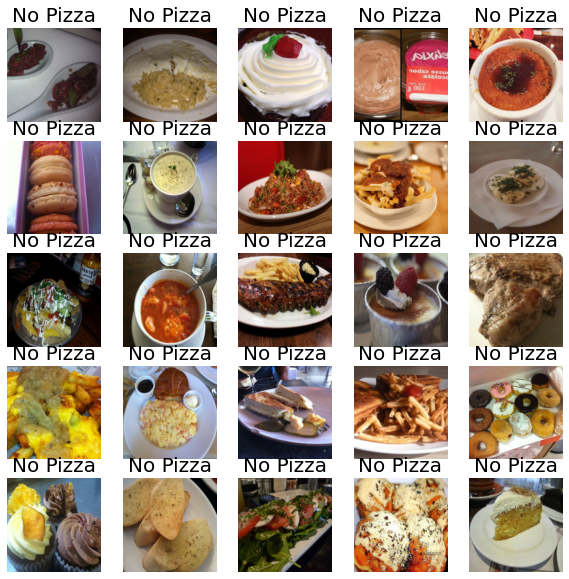

In [8]:
plt.figure(figsize=(10, 10))
for i in tqdm(range(show_ims_nums)):
    ax = plt.subplot(show_num, show_num, i + 1)

    if debug:

        #ax.set_title(labs[i], fontproperties='SimHei', fontsize=20)
        plt.imshow(images[i])
        plt.axis("on")
        
    else :
        
        ax.set_title(labs[i], fontproperties='SimHei', fontsize=20)
        plt.imshow(images[i])
        plt.axis("off")

In [9]:
batch_size = 40
num_works = 0
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_works)
# testing 
for ims, lable in loader :
    print(f'Image Shape :{ims.shape}')
    print(f'Lable :{lable.shape}')
    break

Image Shape :torch.Size([40, 3, 224, 224])
Lable :torch.Size([40])


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Baseline Model


In [10]:
model = models.resnet50(weights = models.ResNet50_Weights.DEFAULT)
model.conv1 = nn.Conv2d(3, 64, 7, 2, 3, bias=False)
model.fc = nn.Linear(in_features=2048, out_features=2, bias=True)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

model

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
def fit(model: nn.Module, loader: DataLoader, optimizer:torch.optim.Optimizer, loss_fn: Any, device: Any, Epochs: int, Loss_List) :
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer=optimizer, T_0=5)
    print(f'初始化的学习率 :',optimizer.defaults['lr'])

    for epoch in range(Epochs) :
        model.to(device)
        model.train()

        epochs_loss = 0.0
        epochs_acc = 0.0
        step = 0
       
        for image, lable in tqdm(loader, leave=False) :
            image = image.to(device)
            lable = lable.to(device)

            optimizer.zero_grad()
            with torch.set_grad_enabled(True) :
                model_out = model(image)
                loss = loss_fn(model_out, lable) # 计算损失
                _, pred = torch.max(model_out, 1)

                loss.backward()
                optimizer.step()
                scheduler.step()

                epochs_acc += torch.sum(pred == lable.data)
                epochs_loss += loss.item() * len(model_out)

                writer.add_scalar(f'{epoch} Acc', epochs_acc, global_step=step)

            step += 1
        
        data_size = len(loader.dataset)
        epochs_loss = epochs_loss / data_size
        epochs_acc = epochs_acc.double() / data_size
        print(f'Epoch {epoch + 1}/{Epochs} | Loss: {epochs_loss:.4f} | Acc: {epochs_acc:.4f}')
        Loss_List.append(epochs_loss)
        
        writer.add_scalar('Loss', epochs_loss, global_step=epoch)
        writer.add_scalar('Acc',epochs_acc, global_step=epoch)

    torch.save(model.state_dict(),'model.bin')
    print('==>> Mdoel Saved!!')

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Train Model


In [12]:
epochs_loss_list = []

fit(model=model,
    loader=loader,
    optimizer=optimizer,
    loss_fn=loss_fn, 
    device=device,
    Epochs=10,
    Loss_List=epochs_loss_list)

初始化的学习率 : 0.0001


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/10 | Loss: 0.5558 | Acc: 0.7421


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2/10 | Loss: 0.3369 | Acc: 0.8576


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3/10 | Loss: 0.2378 | Acc: 0.9090


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 4/10 | Loss: 0.1823 | Acc: 0.9262


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 5/10 | Loss: 0.1183 | Acc: 0.9578


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 6/10 | Loss: 0.1128 | Acc: 0.9613


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 7/10 | Loss: 0.0878 | Acc: 0.9736


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 8/10 | Loss: 0.0793 | Acc: 0.9730


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 9/10 | Loss: 0.0439 | Acc: 0.9863


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 10/10 | Loss: 0.0371 | Acc: 0.9888
==>> Mdoel Saved!!


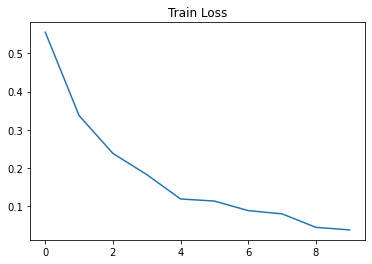

In [13]:
plt.title('Train Loss')
plt.plot(epochs_loss_list)
plt.show()